# Thera Bank Personal Loan Campaign

### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


### Domain: Banking

### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

     ID: Customer ID
     Age: Customer's age in completed years
     Experience: #years of professional experience
     Income: Annual income of the customer ($000$)
     ZIP Code: Home Address ZIP code.
     Family: Family size of the customer
     CCAvg: Avg. spending on credit cards per month ($000$)
     Education: Education Level. 
        1: Undergrad; 
        2: Graduate; 
        3: Advanced/Professional
     Mortgage: Value of house mortgage if any ($000$). 
     Personal Loan: Did this customer accept the personal loan offered in the last campaign?
     Securities Account: Does the customer have a securities account with the bank?
     CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
     Online: Does the customer use internet banking facilities?
     Credit card: Does the customer use a credit card issued by the bank?
        

### Learning Outcomes:
    
     Exploratory Data Analysis
     Preparing the data to train a model
     Training and making predictions using a classification model 
     Modelevaluation

### Objective:
### The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
#Prevents displaying warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
#Loading the data file
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#check the file - display the view first 5 rows of Bank_Personal_Loan_Modelling.csv
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# displays the column info for Bank_Personal_Loan_Modelling.csv
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# displays the shape (rows and columns) of the data in the loan dataframe.
loan.shape

(5000, 14)

In [7]:
# displays the calculations of basic statisical data
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# Checking for any null values in the data
loan.isnull().values.any() 

False

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
         Number of unique in each column
         Number of people with zero mortgage
         Number of people with zero credit card spending per month
         Value counts of all categorical columns
         Univariate and Bivariate
         Get data model ready

In [9]:
# Checking the unique values in each column.
loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
#Finding the number of people with zero mortgage-3462
loan.groupby('Mortgage')['ID'].count()

Mortgage
0      3462
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Name: ID, Length: 347, dtype: int64

In [11]:
#Finding the number of people with zero credit card spending-106
loan.groupby('CCAvg')['ID'].count()

CCAvg
0.0     106
0.1     183
0.2     204
0.3     241
0.4     179
       ... 
8.8       9
8.9       1
9.0       2
9.3       1
10.0      3
Name: ID, Length: 108, dtype: int64

In [12]:
#Displaying the value counts
loan.value_counts()

ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
5000  28   4           83      92612     3       0.8    1          0         0              0                   0           1       1             1
1670  43   18          21      95037     2       1.4    2          0         0              0                   0           1       1             1
1663  63   38          84      94607     4       0.1    2          0         0              0                   0           0       0             1
1664  57   32          42      95070     3       0.5    2          0         0              1                   0           1       0             1
1665  61   35          63      91605     1       1.6    1          0         0              0                   0           1       0             1
                                                                                                                     

In [13]:
# Diaplay the correlation matrix 
loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


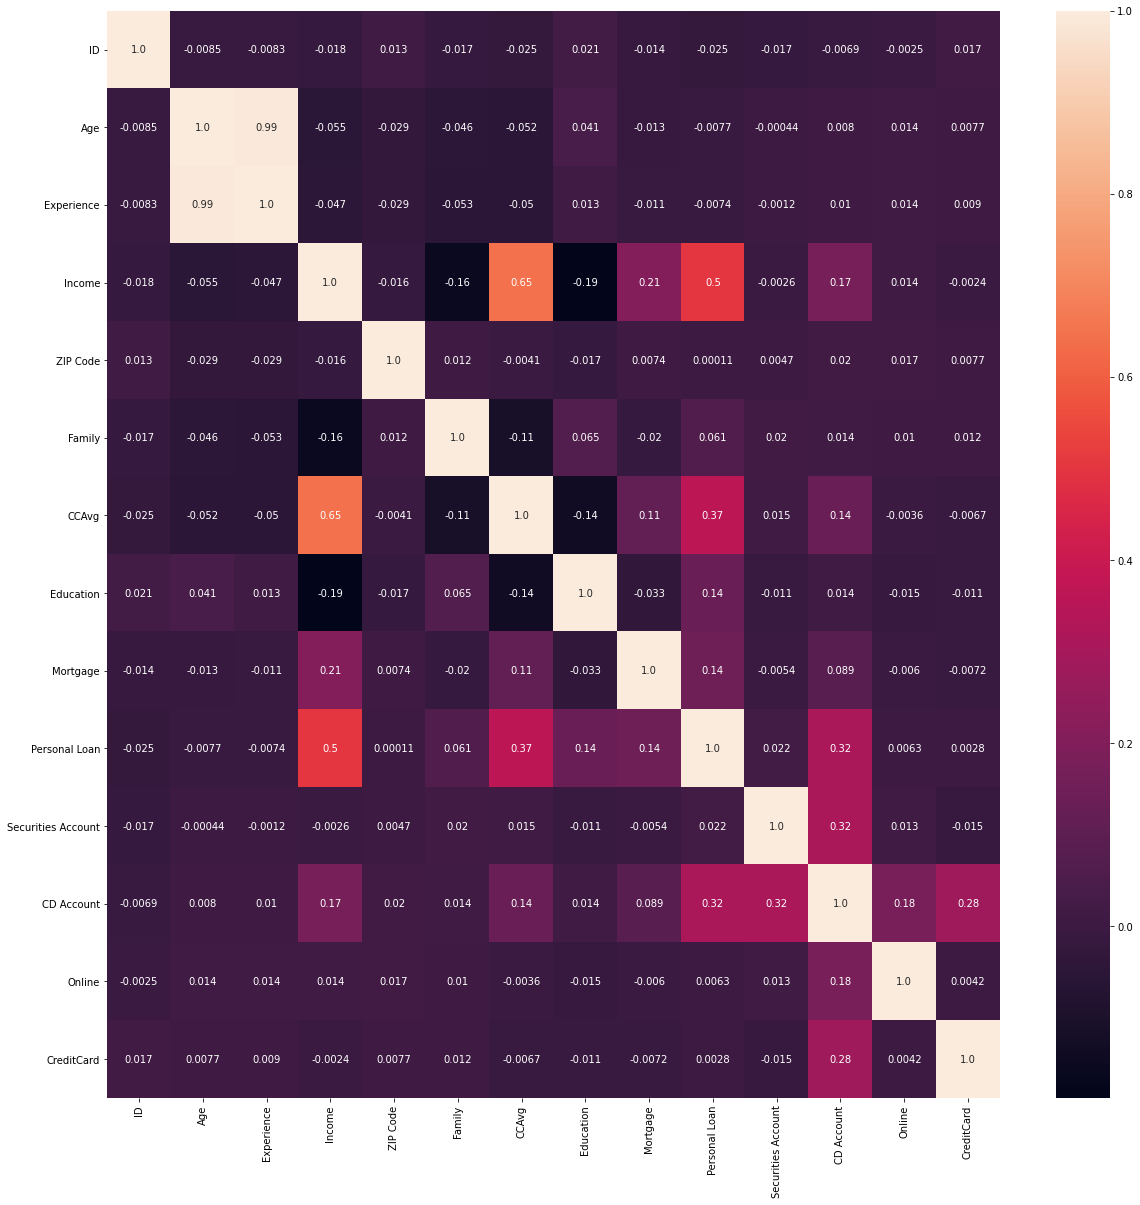

In [14]:
#Heat Map of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(loan.corr(), annot=True, fmt=".2")
plt.show()

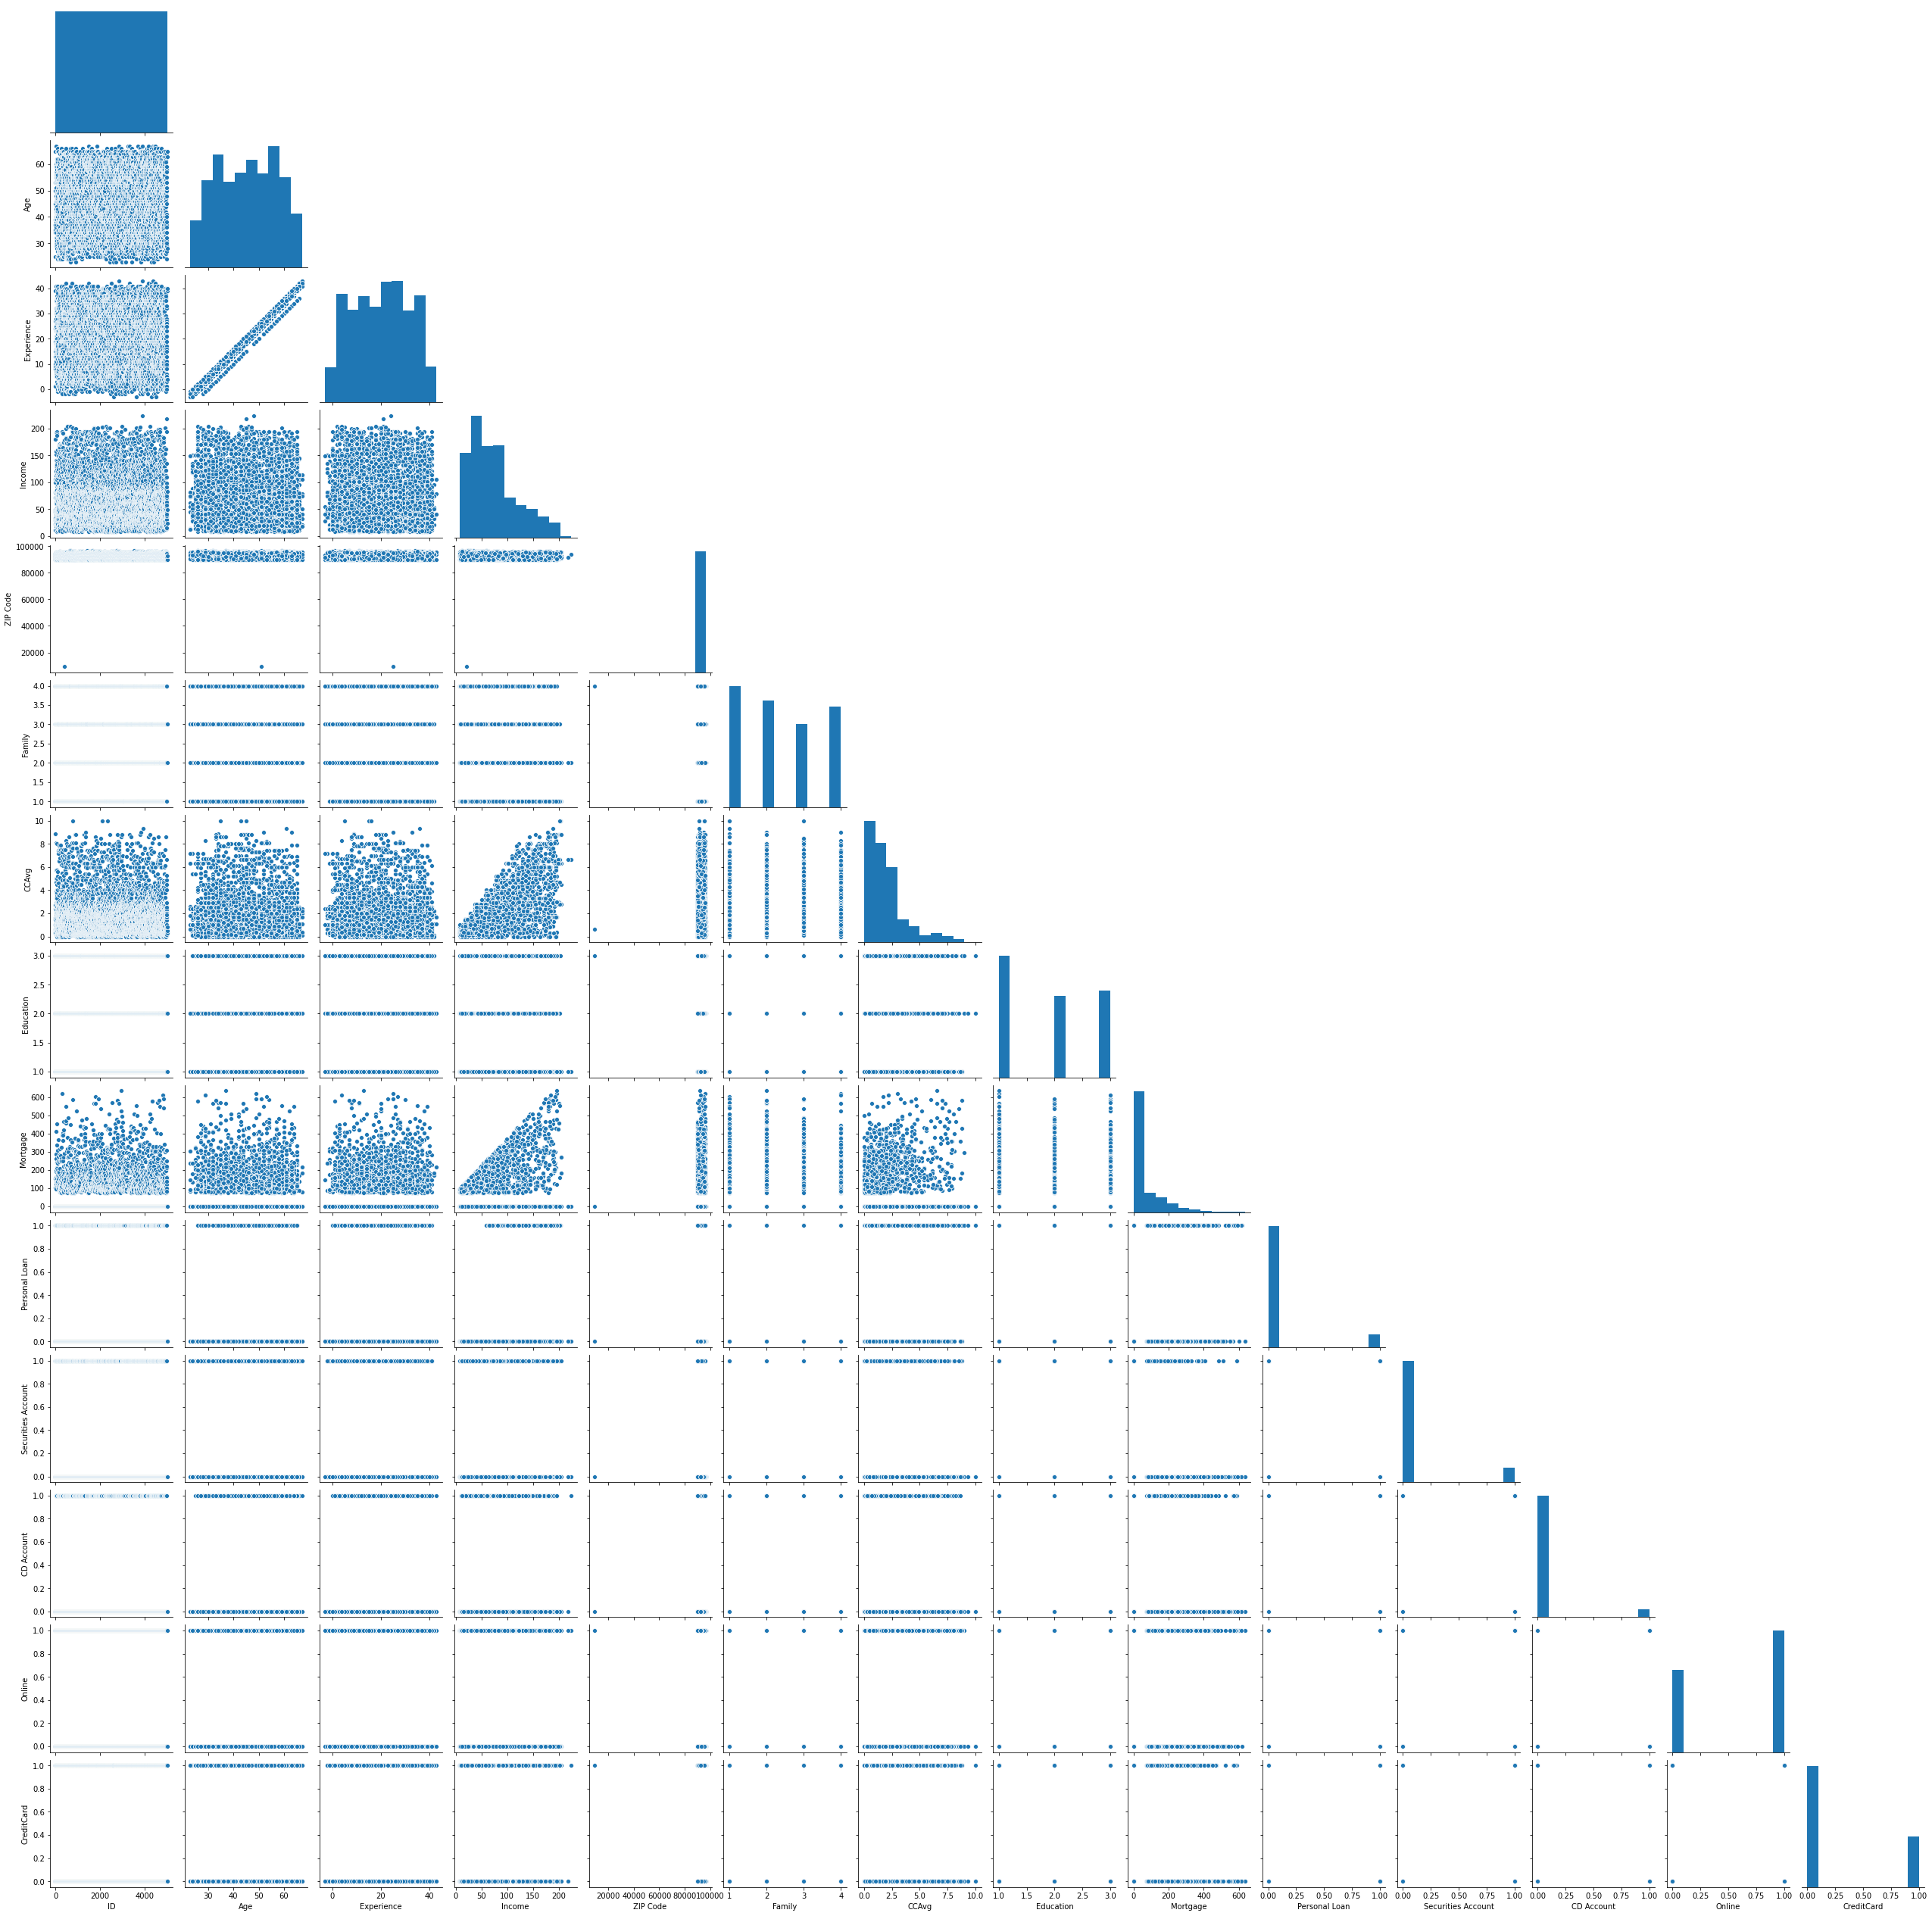

In [20]:
#pairplot of the data
sns.pairplot(loan,diag_kind='auto', corner=True)


In [21]:
#remove the zip code column based on the the column being numeric but adds no value to the model
loan = loan.drop('ZIP Code', axis=1)

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [22]:
#splitting the data in 70/30 ratio - 70 to training; 30 to test data

Y = loan['Personal Loan']
X = loan.drop(columns = {'Personal Loan'})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

X_train.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,1,2.0,2,0,0,0,1,0
65,66,59,35,131,1,3.8,1,0,0,0,1,1
177,178,29,3,65,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,3,0.2,2,0,0,0,1,0


In [23]:
#Checking the data split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [24]:
# Fit the Logistic Regression model on the training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

#predict metric on test
y_predict = model.predict(X_test)


Training Data Accuracy: 95.14%
Test Data Accuracy: 94.53%
Precision: 56.38%
Recall: 83.17%
F1 Core: 67.20%
ROC AUC Score: 89.26%


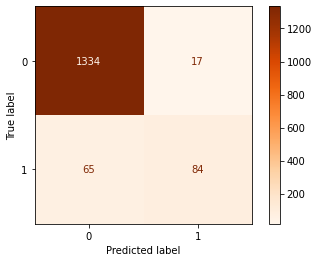

In [25]:
#Displaying the Train/Test data Accuracy, Precision, Recall, F1 Core and ROC AUC metrics

print('Training Data Accuracy: {0:0.2f}%'.format( model.score(X_train, y_train) *100))
print ('Test Data Accuracy: {0:0.2f}%'.format(model.score(X_test, y_test)*100))
print ('Precision: {0:0.2f}%'.format(metrics.precision_score(y_predict, y_test)*100))
print('Recall: {0:0.2f}%'.format (metrics.recall_score(y_predict, y_test)*100))
print('F1 Core: {0:0.2f}%'.format(metrics.f1_score(y_predict, y_test)*100))
print('ROC AUC Score: {0:0.2f}%'.format( metrics.roc_auc_score(y_predict, y_test)*100))

#plotting the confusion matrix
metrics.plot_confusion_matrix(model,X_test,  y_test, values_format='d',cmap='Oranges')

### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)


Using different parameters; adding C parameter, random state, max_iter and changing the solver to "lbfgs", the model performed at 88.67%.  This shows that the model's performance was not drastically affected by the changing parameters.  However, when the max_iter (max_iter=10) decreased, the model had drastic results except for the TN (True Negative) result:

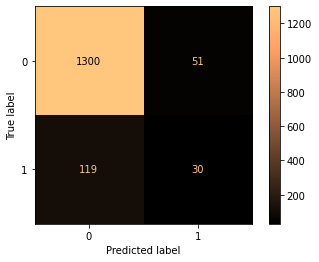


In [71]:
#Testing model using different parameters (max_iter=100) so show the changes from the original model with max_iter=10

model = LogisticRegression(C=50.0,random_state=42,max_iter=100,solver="lbfgs")
model.fit(X_train, y_train)



LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# displaying the model score

model_score = model.score(X_test, y_test)
print('{0:0.2f}%'.format(model_score *100))

94.40%


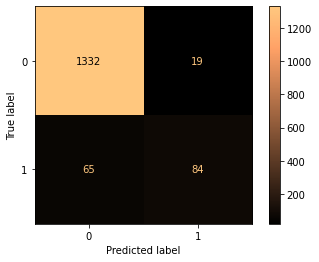

In [75]:
# displaying the confusion matrix of the change model parameters

metrics.plot_confusion_matrix(model,X_test,  y_test, values_format='d',cmap='copper')

### 6. Give Business understanding of your model? (5 marks)

Conclusion:

True Positives (TP): The model correctly predicted that 82 customers will accept the personal loan

True Negatives (TN): The model correctly predicted that 1332 customers will not accept the personal loan

False Positives (FP): The model predicted that 19 customers will accept the personal loan but were falsely predicted as the customer would not accept the loan.

False Negatives (FN): The model predicted that 67 customers will not accept the personal loan but were falsely predicted as the customer would accept the loan.

